# Global Glacier Mass Loss Analysis (2000–2023)

Analysis of global glacier mass change using the WGMS GlaMBIE dataset.

## Data Source

World Glacier Monitoring Service (WGMS)  
GlaMBIE Global Glacier Mass Balance Dataset (Calendar Year Version 2024-07)

Dataset DOI: 10.5904/wgms-glambie-2024-07

## Data Loading

In [1]:
import pandas as pd

df = pd.read_csv("data/0_global.csv")

df.head()

,start_dates,end_dates,glacier_area,region,combined_gt,combined_gt_errors,combined_mwe,combined_mwe_errors
0,2000.0,2001.0,704082.69565,global,-78.044147,111.560951,-0.111179,0.158362
1,2001.0,2002.0,701805.49875,global,-215.169311,95.300101,-0.307516,0.135050
2,2002.0,2003.0,699528.30185,global,-128.466367,91.146345,-0.184200,0.128930
3,2003.0,2004.0,697251.10495,global,-192.672470,72.798877,-0.277163,0.102895
4,2004.0,2005.0,694973.90805,global,-229.236911,73.022158,-0.330842,0.102844


## Exploratory Analysis
Initial visualization of annual global glacier mass change.

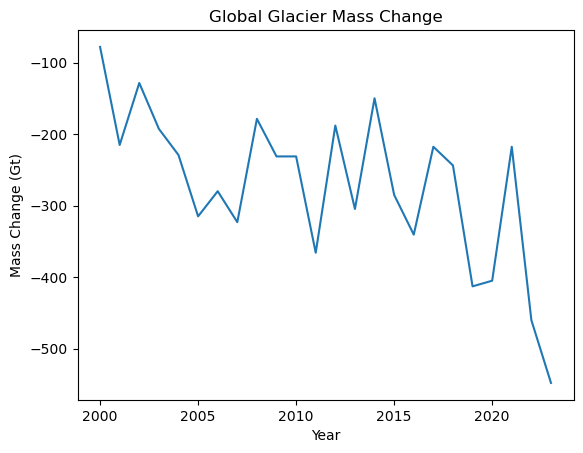

In [2]:
import matplotlib.pyplot as plt

plt.plot(df["start_dates"], df["combined_gt"])
plt.xlabel("Year")
plt.ylabel("Mass Change (Gt)")
plt.title("Global Glacier Mass Change")
plt.show()

In [3]:
df["combined_gt"].mean()

np.float64(-272.6029428344951)

In [4]:
df["combined_gt"].iloc[0], df["combined_gt"].iloc[-1]

(np.float64(-78.04414729402814), np.float64(-548.025110248126))

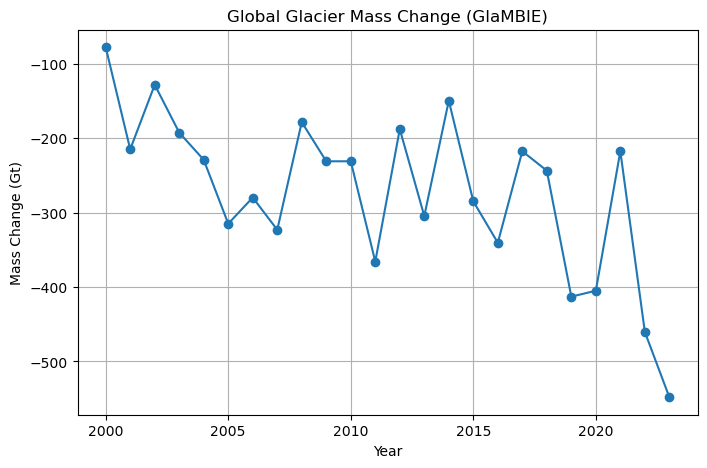

In [5]:
plt.figure(figsize=(8,5))
plt.plot(df["start_dates"], df["combined_gt"], marker="o")
plt.xlabel("Year")
plt.ylabel("Mass Change (Gt)")
plt.title("Global Glacier Mass Change (GlaMBIE)")
plt.grid(True)
plt.show()

## Linear Trend Analysis

Estimation of long-term trend in glacier mass change using linear regression.

In [6]:
import numpy as np

# linear fit
m, b = np.polyfit(df["start_dates"], df["combined_gt"], 1)

m

np.float64(-9.976678260034017)

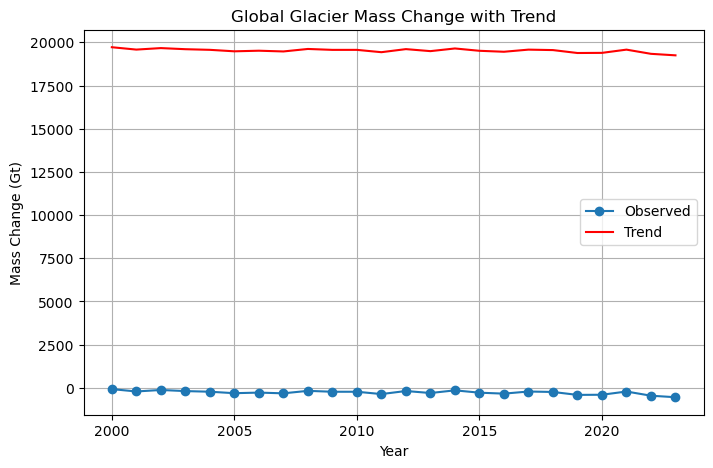

In [7]:
plt.figure(figsize=(8,5))

# actual data
plt.plot(df["start_dates"], df["combined_gt"], marker="o", label="Observed")

# trend line
plt.plot(df["start_dates"], df["combined_gt"] + b, color="red", label="Trend")

plt.xlabel("Year")
plt.ylabel("Mass Change (Gt)")
plt.title("Global Glacier Mass Change with Trend")
plt.legend()
plt.grid(True)

plt.show()

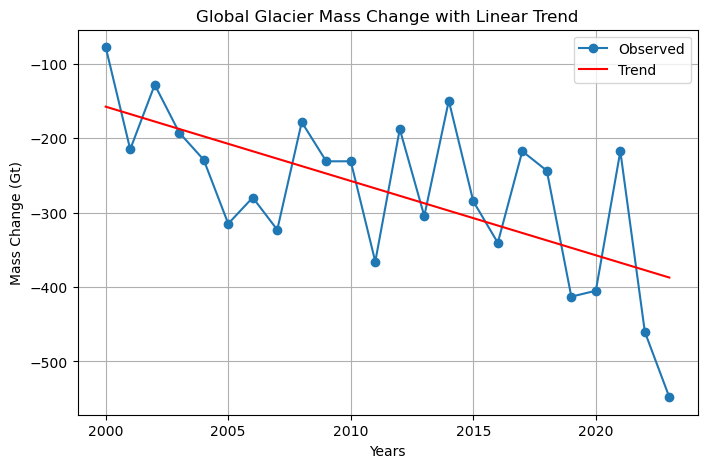

In [8]:
years= df["start_dates"].values
trend = m * years + b

plt.figure(figsize=(8,5))
plt.plot(years, df["combined_gt"], marker="o", label="Observed")
plt.plot(years, trend, color="red", label="Trend")

plt.xlabel("Years")
plt.ylabel("Mass Change (Gt)")
plt.title("Global Glacier Mass Change with Linear Trend")
plt.legend()
plt.grid(True)
plt.show()

## Cumulative Mass Loss

Computation of total accumulated glacier mass loss since 2000.

In [9]:
# Calculation of cumulative loss

df["cumulative_gt"] = df["combined_gt"].cumsum()

df[["start_dates", "cumulative_gt"]].head()

,start_dates,cumulative_gt
0,2000.0,-78.044147
1,2001.0,-293.213458
2,2002.0,-421.679826
3,2003.0,-614.352295
4,2004.0,-843.589206


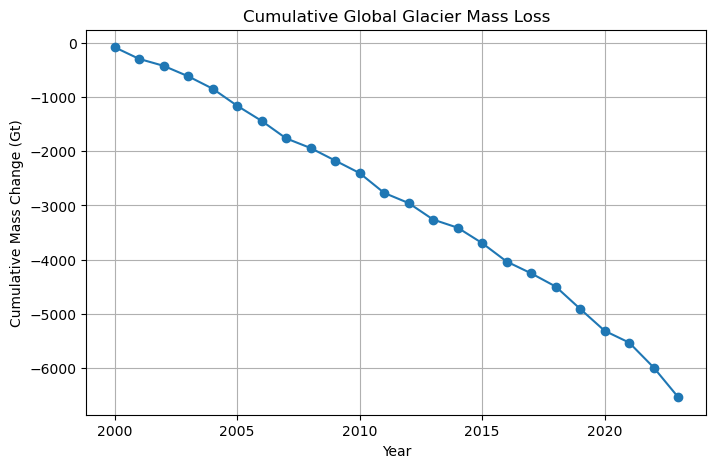

In [10]:
plt.figure(figsize=(8,5))
plt.plot(df["start_dates"], df["cumulative_gt"], marker="o")

plt.xlabel("Year")
plt.ylabel("Cumulative Mass Change (Gt)")
plt.title("Cumulative Global Glacier Mass Loss")
plt.grid(True)

plt.show()

## Estimated Contribution to Sea Level Rise

Conversion of total glacier mass loss to equivalent global mean sea level rise 
(assuming 360 Gt ≈ 1 mm).

In [11]:
# Convert Gt to mm sea level rise

total_loss = df["cumulative_gt"].iloc[-1]
sea_level_rise_mm = abs(total_loss) / 360
sea_level_rise_mm

np.float64(18.173529522299678)

In [12]:
# Calculate Residuals

df["trend"] = m * df["start_dates"] + b
df["residuals"] = df["combined_gt"] - df["trend"]

df[["start_dates", "residuals"]].head()

,start_dates,residuals
0,2000.0,79.826996
1,2001.0,-47.321490
2,2002.0,49.358132
3,2003.0,-4.871292
4,2004.0,-31.459055


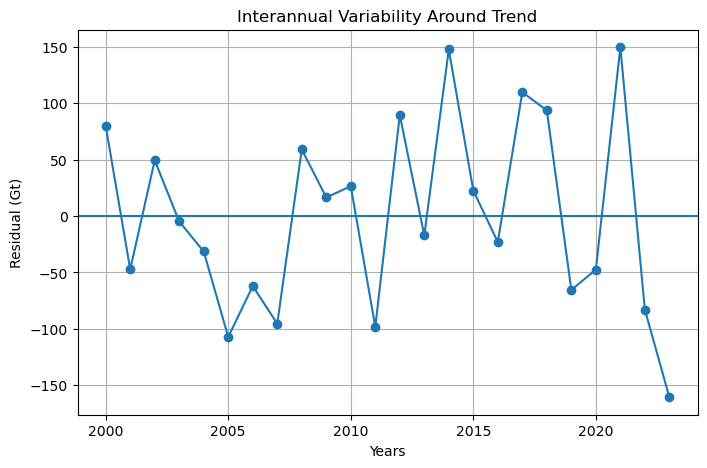

In [13]:
plt.figure(figsize=(8,5))
plt.axhline(0)
plt.plot(df["start_dates"], df["residuals"], marker="o")

plt.xlabel("Years")
plt.ylabel("Residual (Gt)")
plt.title("Interannual Variability Around Trend")
plt.grid(True)

plt.show()

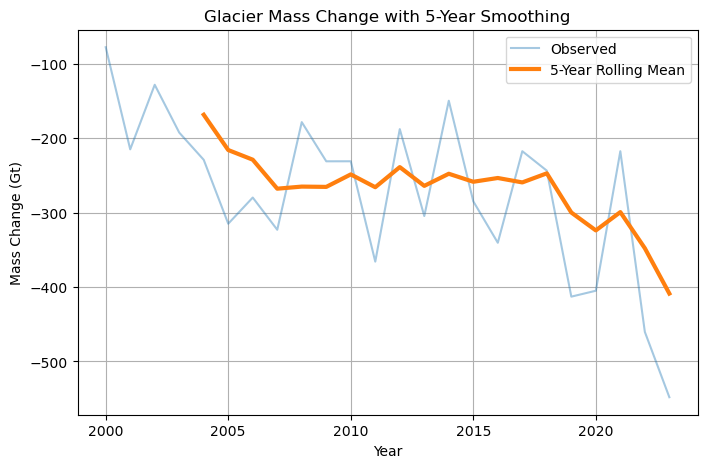

In [14]:
# 5-year rolling mean
df["rolling_5yr"] = df["combined_gt"].rolling(window=5).mean()

plt.figure(figsize=(8,5))
plt.plot(df["start_dates"], df["combined_gt"], alpha=0.4, label="Observed")
plt.plot(df["start_dates"], df["rolling_5yr"], linewidth=3, label="5-Year Rolling Mean")

plt.xlabel("Year")
plt.ylabel("Mass Change (Gt)")
plt.title("Glacier Mass Change with 5-Year Smoothing")
plt.legend()
plt.grid(True)

plt.show()

## Key Results

- Mean annual glacier mass loss ≈ **-273 Gt per year**
- Linear trend slope ≈ **-10 Gt per year²**, indicating accelerating loss
- Total cumulative mass loss since 2000 ≈ **-6500 Gt**
- Equivalent sea level rise contribution ≈ **18 mm**
- Persistent downward trend clearly visible after 5-year smoothing

These results indicate a sustained and accelerating global glacier mass decline over the last two decades.